<a href="https://colab.research.google.com/github/adrewtran117/AlgoTrading/blob/main/SentdexAlgoTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro and Getting Stock Price Data - Python Programming for Finance p.1

In [ ]:
#Intro and Getting Stock Price Data - Python Programming for Finance p.1
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from matplotlib import style
from bs4 import BeautifulSoup
import datetime as dt
import yfinance as yf

In [ ]:
#Data from API
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

yf.pdr_override() #https://pypi.org/project/yfinance/

df = pdr.get_data_yahoo("TSLA", start, end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [ ]:
#Handling Data and Graphing - Python Programming for Finance p.2
df.to_csv('tsla.csv')

In [ ]:
#Reading a CSV in:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
print(df.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


                High       Low
Date                          
2010-06-29  1.666667  1.169333
2010-06-30  2.028000  1.553333
2010-07-01  1.728000  1.351333
2010-07-02  1.540000  1.247333
2010-07-06  1.333333  1.055333


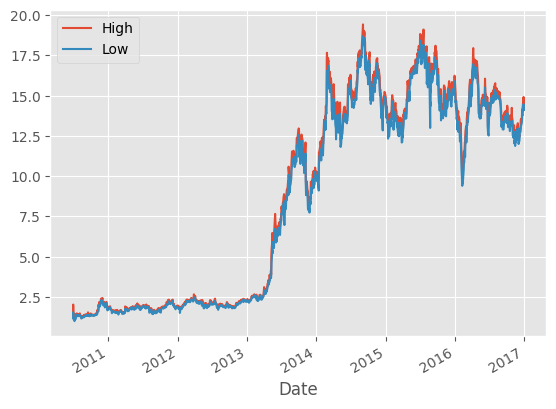

In [ ]:
#Visualizing

# df.plot()
df[['High', 'Low']].plot()
print(df[['High', 'Low']].head())

#Volumes, how many shares of that company are traded

In [40]:
#The moving average indicator calculates the average price over a given period
df.dropna(inplace=True) #Drop NaNs, so we can use df.head() below if we want, but we lose 100 days of data
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods=0).mean()
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-11-17  2.013333  2.050000  1.907333  1.966000   1.966000  11250000   
2010-11-18  2.044667  2.049333  1.928000  1.992667   1.992667  14341500   
2010-11-19  2.010667  2.091333  1.980000  2.066000   2.066000  17257500   
2010-11-22  2.104667  2.230000  2.100000  2.226667   2.226667  22945500   
2010-11-23  2.219333  2.378667  2.146000  2.304667   2.304667  23667000   

               100ma  
Date                  
2010-11-17  1.966000  
2010-11-18  1.979333  
2010-11-19  2.008222  
2010-11-22  2.062833  
2010-11-23  2.111200  


<BarContainer object of 1541 artists>

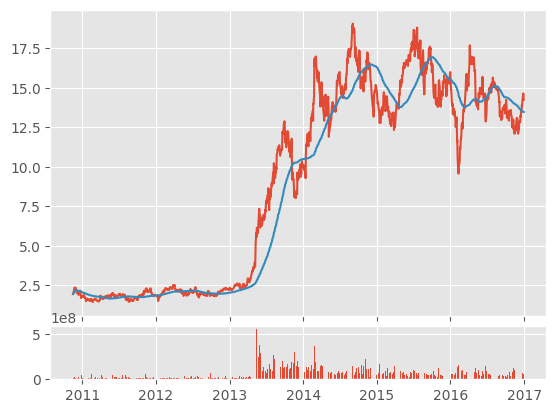

In [44]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])